<div class="alert alert-block alert-success">
    
# FIT5149 Assignment 1
#### Student Name: Muhammad Bilal Elahi
#### Student ID: 34200223
#### Group Number: 054
    
    
Date: 3/09/2024


Environment: Python 3.12.5

    
</div>

<div class="alert alert-block alert-danger">
    
## Table of Contents

</div>    

[1. Introduction](#Intro) <br>
$\;\;\;\;$[1.1. Background](#background) <br>
$\;\;\;\;$[1.2. Objectives](#objectives) <br>
[2. Importing Libraries](#libs) <br>
$\;\;\;\;$[2.1. Mounting Google Drive](#mount_drive) <br>
[3. Examining Patent Files](#examine) <br>
$\;\;\;\;$[3.1. Input File Observations](#inp_obs) <br>
[4. Data Exploration and Preprocessing](#dep) <br>
$\;\;\;\;$[4.1. Reading File](#file_read) <br>
$\;\;\;\;$[4.2. Exploratory Analysis](#exp_analysis) <br>
$\;\;\;\;$[4.3. Outlier Removal](#outlier) <br>
[5. Feature Extraction](#feature_ext) <br>
$\;\;\;\;$[5.1. Creating Lagged Variables](#lagged) <br>
$\;\;\;\;$[5.2. Creating Features from Date](#date) <br>
$\;\;\;\;\;\;\;\;$[5.2.1 Creating Ordinal Features](#ordinal_date) <br>
$\;\;\;\;\;\;\;\;$[5.2.2 Creating Cyclic Features](#cyclic_date) <br>
$\;\;\;\;\;\;\;\;$[5.2.3 Creating Term End Features](#term_date) <br>
$\;\;\;\;$[5.3. Creating Binned Features](#json_veri) <br>
$\;\;\;\;$[5.4. Dropping Future Predictors](#json_veri) <br>
$\;\;\;\;$[5.5. Adding Transformed Features](#json_veri) <br>
[6. Feature Selection and Model Evaluation](#feature_sel) <br>
$\;\;\;\;$[6.1. Ridge Regression](#ridge) <br>
$\;\;\;\;\;\;\;\;$[6.1.1 Train-Test Split and Cross-Validation](#ridge_split) <br>
$\;\;\;\;\;\;\;\;$[6.1.2 Creating the Pipeline](#ridge_pipeline) <br>
$\;\;\;\;\;\;\;\;$[6.1.3 Plot RMSE Against Lambda](#ridge_graph) <br>
$\;\;\;\;\;\;\;\;$[6.1.4 Evaluate the Final Model on the Test Data](#ridge_eval) <br>
$\;\;\;\;\;\;\;\;$[6.1.5 Feature Importance](#ridge_feature) <br>
$\;\;\;\;$[6.2. Lasso Regression](#lasso) <br>
$\;\;\;\;\;\;\;\;$[6.2.1 Set Up the Pipeline](#lasso_pipeline) <br>
$\;\;\;\;\;\;\;\;$[6.2.2 Plot RMSE Against Lambda](#lasso_graph) <br>
$\;\;\;\;\;\;\;\;$[6.2.3 Evaluate the Final Model on the Test Data](#lasso_eval) <br>
$\;\;\;\;\;\;\;\;$[6.2.4 Feature Importance](#lasso_feature) <br>
$\;\;\;\;$[6.3. PCR](#pcr) <br>
$\;\;\;\;\;\;\;\;$[6.2.1 Set Up the Pipeline](#lasso_pipeline) <br>
$\;\;\;\;\;\;\;\;$[6.2.2 Plot RMSE Against Lambda](#lasso_graph) <br>
$\;\;\;\;\;\;\;\;$[6.2.3 Evaluate the Final Model on the Test Data](#lasso_eval) <br>
$\;\;\;\;\;\;\;\;$[6.2.4 Feature Importance](#lasso_feature) <br>
[6. Summary](#summary) <br>
[7. References](#Ref) <br>

<div class="alert alert-block alert-warning">

## 1.  Introduction  <a class="anchor" name="Intro"></a>
    
</div>

<div class="alert alert-block alert-info">
    
### 1.1. Background <a class="anchor" name="background"></a>


In the rapidly evolving financial markets, accurately predicting stock volatility is crucial for investors, portfolio managers, and financial institutions. Volatility, which measures the rate at which the price of a security increases or decreases for a given set of returns, is a key indicator of market sentiment and risk. Understanding and forecasting volatility allows for better risk management, informed decision-making, and the development of trading strategies that can mitigate potential losses. This assignment focuses on the development and evaluation of predictive models aimed at forecasting stock volatility using a combination of fundamental financial indicators and trading data. By leveraging various machine learning techniques, including Ridge Regression, Lasso Regression, and Principal Component Regression (PCR), the goal is to build a robust model that can generalize well across different stocks and market conditions.

<div class="alert alert-block alert-info">
    
### 1.2. Objectives <a class="anchor" name="objectives"></a>

The primary objectives of this assignment are:

**Data Exploration and Preprocessing:**

- To thoroughly explore the given dataset, identifying key features, patterns, and any potential data quality issues such as missing values or outliers.

- To perform feature engineering by creating lagged variables, rolling statistics, and other derived features that capture the temporal nature of the data and enhance the predictive power of the model.
- To preprocess the data by handling categorical variables, scaling numerical features, and preparing the data for model training.

**Model Development:**

- To develop and train multiple predictive models.

- To evaluate the models based on their ability to predict stock volatility, using appropriate metrics such as Root Mean Squared Error (RMSE) to quantify model accuracy.

**Model Comparison and Selection:**

- To compare the performance of the different models on both training and validation datasets, selecting the best-performing model based on RMSE and generalization ability.
 
- To analyze the importance of different features in the final model and interpret the results in the context of financial market predictions.

**Submission and Deployment:**

- To apply the selected model to a separate submission dataset, generating predictions for stock volatility and preparing a submission file.

- To ensure that the final model is robust, scalable, and capable of being deployed in a real-world financial setting for ongoing volatility prediction and risk management.

<div class="alert alert-block alert-warning">
    
## 2.  Importing Libraries  <a class="anchor" name="libs"></a>
 </div>

<div class="alert alert-block alert-warning"> 

## 4.  Data Exploration and Preprocessing <a class="anchor" name="dep"></a>

</div>

<div class="alert alert-block alert-info">
    
### 4.1. Reading File <a class="anchor" name="file_read"></a>

In this step we will reading the input file naming `A1_stock_volatility_labeled.csv` from our local repository.

In [53]:
import pandas as pd
import warnings

# Load the datasets
data = pd.read_csv('A1_stock_volatility_labeled.csv')

# Submission Set
submission_data = pd.read_csv('A1_stock_volatility_submission.csv')

<div class="alert alert-block alert-info">
    
### 4.2. Exploratory analysis <a class="anchor" name="exp_analysis"></a>

In [54]:
# Display the first few rows of the dataset to understand its structure
data.head()

,Date,Open,Close,High,Low,Volume,Amount,Avg_Price,Return,Volatility,...,Gross Profit,EPS,Total Assets,Total Liabilities,Total Equity,Cash and Cash Equivalents,Operating Cash Flow,Investing Cash Flow,Financing Cash Flow,Stock
0,2022-01-01,164.634,144.954,165.074,136.849,40101533,5.732915e+09,148.347000,-12.188473,1.795721,...,9.100000e+08,0.94,1.033000e+10,5.173000e+09,5.154000e+09,1.113000e+09,255000000.0,-79000000.0,-546000000.0,A
1,2022-02-01,146.164,135.994,150.734,128.694,42313071,5.677741e+09,141.947684,-6.181271,2.117435,...,9.100000e+08,0.94,1.033000e+10,5.173000e+09,5.154000e+09,1.113000e+09,255000000.0,-79000000.0,-546000000.0,A
2,2022-03-01,136.464,137.964,145.834,132.534,46251907,6.205439e+09,139.889217,1.448593,2.072637,...,9.100000e+08,0.94,1.033000e+10,5.173000e+09,5.154000e+09,1.113000e+09,255000000.0,-79000000.0,-546000000.0,A
3,2022-04-01,139.814,125.114,142.924,123.084,43916920,5.566595e+09,132.867500,-9.314024,2.113012,...,1.771000e+09,1.86,1.046000e+10,5.333000e+09,5.122000e+09,1.186000e+09,538000000.0,-155000000.0,-669000000.0,A
4,2022-05-01,124.224,133.404,136.614,118.484,45551962,5.564296e+09,127.519238,6.625957,2.746538,...,1.771000e+09,1.86,1.046000e+10,5.333000e+09,5.122000e+09,1.186000e+09,538000000.0,-155000000.0,-669000000.0,A


1. Dataset Overview:

- The dataset contains 22 columns and 13,486 rows.

- Date and Stock are categorical variables.
 
- Other columns are primarily numerical and represent various financial metrics and trading data

In [55]:
# Display the summary of the dataset
data.describe(include='all')

,Date,Open,Close,High,Low,Volume,Amount,Avg_Price,Return,Volatility,...,Gross Profit,EPS,Total Assets,Total Liabilities,Total Equity,Cash and Cash Equivalents,Operating Cash Flow,Investing Cash Flow,Financing Cash Flow,Stock
count,13486,13486.000000,13486.000000,13486.000000,13486.000000,1.348600e+04,1.348600e+04,13486.000000,13486.000000,13486.000000,...,1.348600e+04,13486.000000,1.348600e+04,1.348600e+04,1.348600e+04,1.348600e+04,1.348600e+04,1.348600e+04,1.348600e+04,13486
unique,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,613
top,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
freq,613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
mean,NaN,1741.328666,1735.367690,1829.655853,1637.911281,4.112382e+07,3.228092e+09,1733.197353,-0.700045,2.396125,...,2.857836e+09,1.949710,1.821612e+10,1.091715e+10,7.298849e+09,1.510022e+09,1.178012e+09,-7.025812e+08,-4.600039e+08,NaN
std,NaN,15564.852252,15628.651843,16210.989075,14950.536329,1.211088e+08,1.660591e+10,15573.457915,13.110310,2.033964,...,1.130077e+10,5.161378,5.717197e+10,3.217662e+10,2.944286e+10,7.989450e+09,5.928045e+09,3.328101e+09,3.485262e+09,NaN
min,NaN,0.011000,0.010000,0.011000,0.008000,4.210000e+02,1.746700e+04,0.010455,-84.347826,0.000000,...,-2.746000e+09,-84.600000,1.410000e+07,2.479000e+06,-8.940000e+09,4.300000e+04,-4.109000e+09,-7.097000e+10,-6.976000e+10,NaN
25%,NaN,22.710000,22.330000,24.750000,20.180000,3.879474e+06,1.125653e+08,22.486262,-6.911791,1.345456,...,1.013000e+08,-0.050000,7.990500e+08,3.497000e+08,2.705000e+08,5.024000e+07,5.240000e+05,-2.515500e+08,-2.350000e+08,NaN
50%,NaN,87.560000,86.645000,93.975000,81.372500,1.145391e+07,4.743543e+08,87.345952,-1.090276,1.980023,...,4.060000e+08,0.990000,2.858000e+09,1.556000e+09,9.840000e+08,1.861000e+08,8.319000e+07,-4.824000e+07,-2.264000e+07,NaN
75%,NaN,356.460000,352.652750,377.180000,325.060000,3.204557e+07,2.097197e+09,351.217239,4.979387,3.001239,...,1.422000e+09,2.860000,9.482000e+09,6.084000e+09,3.111000e+09,5.940000e+08,4.441500e+08,-6.422000e+06,7.465000e+06,NaN


2. First Few Rows of the Dataset:

- The dataset includes trading data such as Open, Close, High, Low prices, and Volume, as well as financial data such as Revenue, Net Income, Gross Profit, EPS, etc.

- The target variable for prediction is Volatility, which is a measure of price variability.

In [56]:
# Check for missing values
data.isnull().sum()

Date                         0
Open                         0
Close                        0
High                         0
Low                          0
Volume                       0
Amount                       0
Avg_Price                    0
Return                       0
Volatility                   0
Revenue                      0
Net Income                   0
Gross Profit                 0
EPS                          0
Total Assets                 0
Total Liabilities            0
Total Equity                 0
Cash and Cash Equivalents    0
Operating Cash Flow          0
Investing Cash Flow          0
Financing Cash Flow          0
Stock                        0
dtype: int64

3. Summary Statistics:

- The summary statistics provide an overview of the numerical data distribution.

- No missing values were detected in the dataset.

In [57]:
# Get the data types of each column
data.dtypes

Date                          object
Open                         float64
Close                        float64
High                         float64
Low                          float64
Volume                         int64
Amount                       float64
Avg_Price                    float64
Return                       float64
Volatility                   float64
Revenue                      float64
Net Income                   float64
Gross Profit                 float64
EPS                          float64
Total Assets                 float64
Total Liabilities            float64
Total Equity                 float64
Cash and Cash Equivalents    float64
Operating Cash Flow          float64
Investing Cash Flow          float64
Financing Cash Flow          float64
Stock                         object
dtype: object

4. Data Types:

- Most columns are float64, representing continuous numerical data.

- Date and Stock are object (categorical) types.

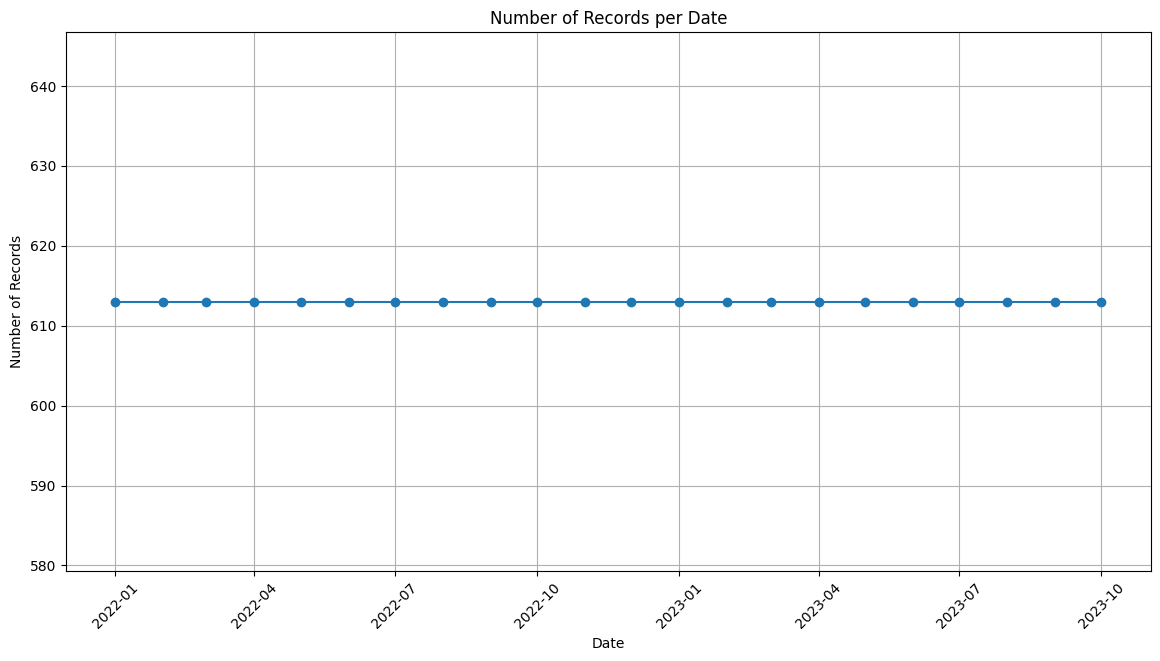

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Date to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Explore the temporal nature of the data
# Group by Date to see if there is any pattern over time in terms of data availability
temporal_grouping = data.groupby('Date').size()

# Plot the temporal distribution
plt.figure(figsize=(14, 7))
plt.plot(temporal_grouping, marker='o')
plt.title('Number of Records per Date')
plt.xlabel('Date')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

1. Temporal Distribution:

- It appears that the dataset is structured with consistent entries across each date, indicating regular updates (likely monthly).

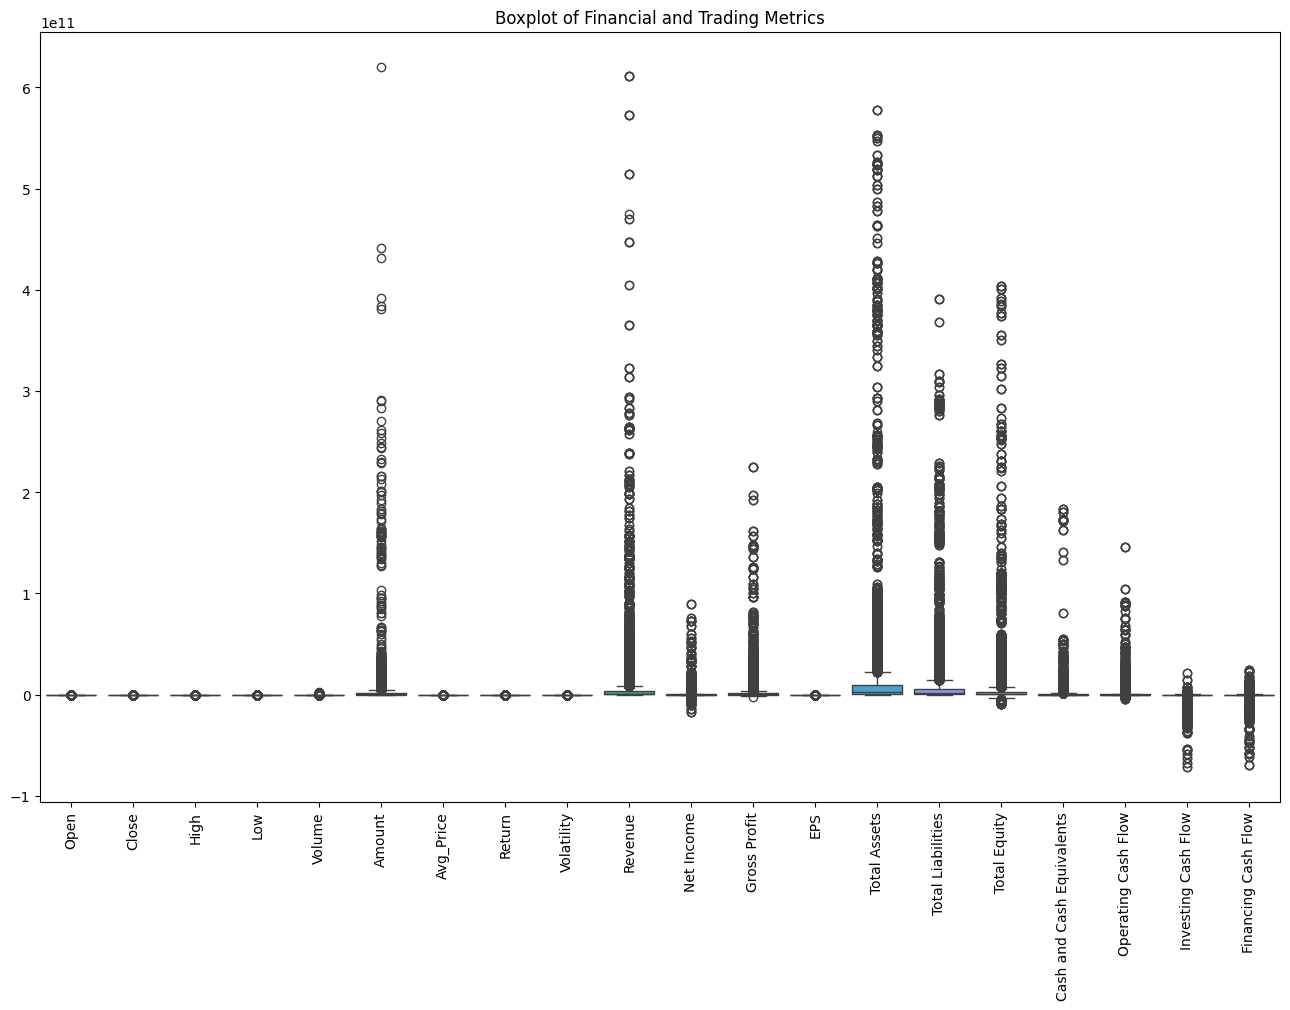

In [59]:
# Visualize the distributions of key financial and trading metrics to check for outliers and irregularities
plt.figure(figsize=(16, 10))
sns.boxplot(data=data.drop(columns=['Date', 'Stock']))
plt.title('Boxplot of Financial and Trading Metrics')
plt.xticks(rotation=90)
plt.show()

2. Outliers and Irregularities:

- The boxplot highlights potential outliers in several financial and trading metrics. Some features show significant variability.

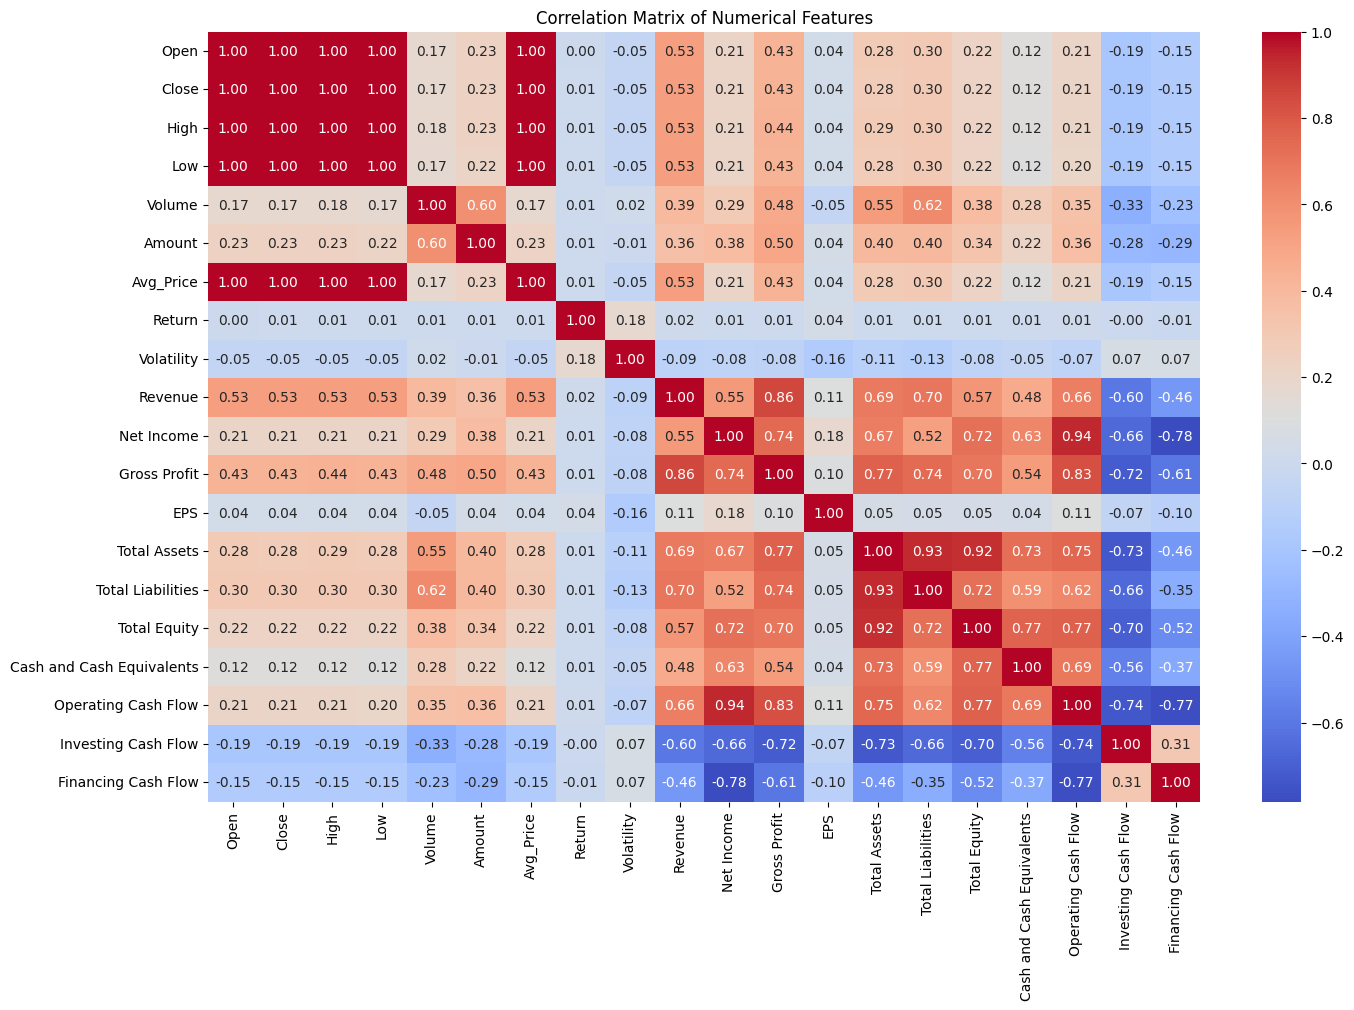

In [60]:
# Filter the DataFrame to include only numerical columns
numerical_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

3. Correlation Analysis:

- The heatmap of the correlation matrix reveals relationships between the various features.

 - Notable correlations:
    
    - Strong correlations among financial metrics such as Assests, Liabilities, and Total Equity.
    
    - Trading metrics such as Open, Close, High, Low, and Average Prices are also strongly correlated.

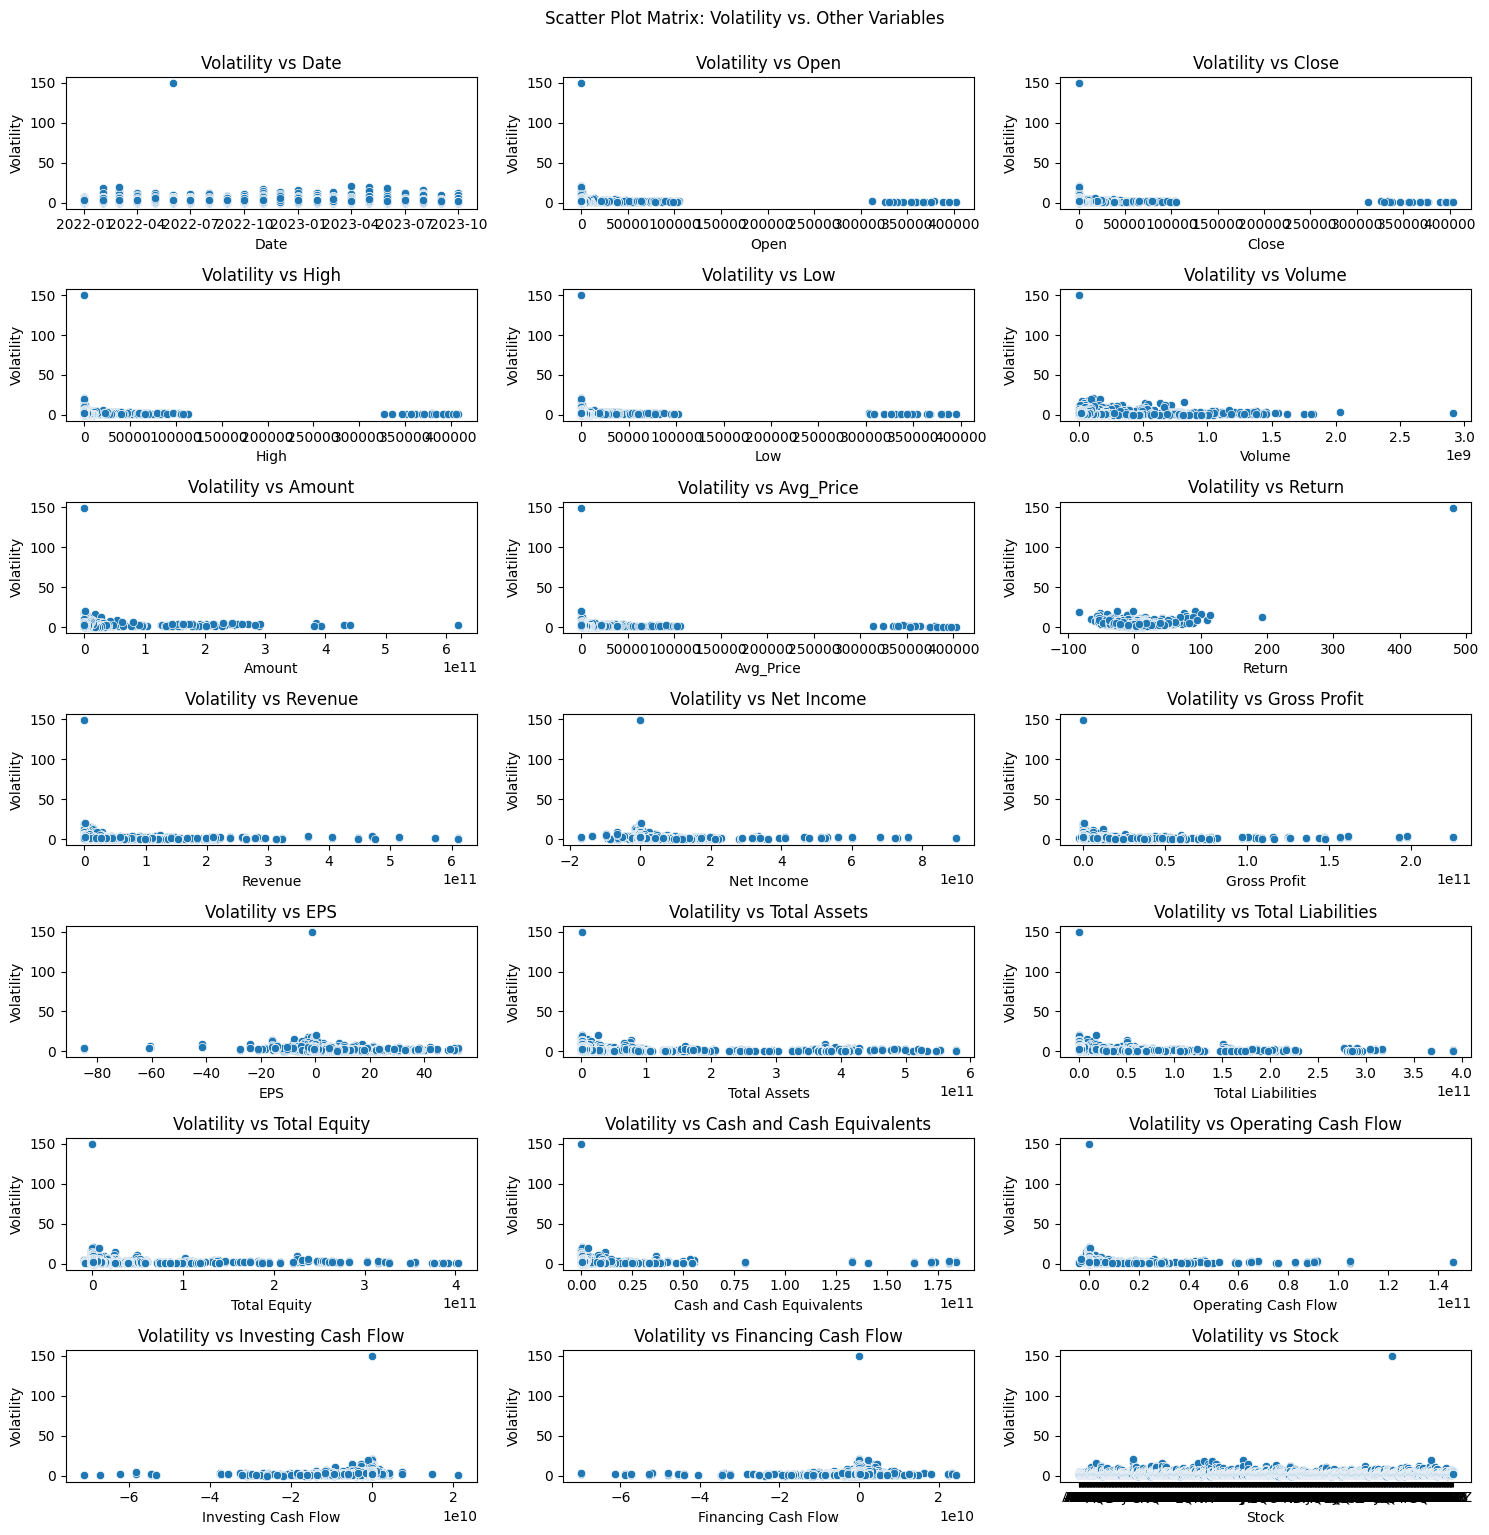

In [61]:
# Define the target variable
target_variable = 'Volatility'

# Filter the numerical columns excluding the target variable
numerical_columns = data.columns.drop(target_variable)

# Define the number of rows and columns for the grid
n_cols = 3
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Generate scatter plots
for i, col in enumerate(numerical_columns):
    sns.scatterplot(x=data[col], y=data[target_variable], ax=axes[i])
    axes[i].set_title(f'{target_variable} vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target_variable)

# Remove any empty subplots
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.suptitle('Scatter Plot Matrix: Volatility vs. Other Variables', y=1.02)
plt.show()

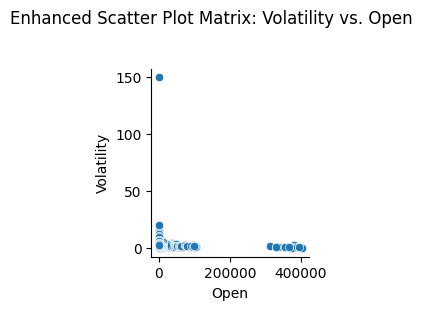

In [62]:
# Create a scatter plot matrix with 'Volatility' against all other variables, colored by 'Stock'
sns.pairplot(data, y_vars=['Volatility'], x_vars=['Open'], palette='coolwarm', height=2.5)

# Adjust the plot for better readability
plt.suptitle('Enhanced Scatter Plot Matrix: Volatility vs. Open', y=1.2)
plt.show()

In [63]:
# Display summary statistics of the 'Volatility' column
data['Volatility'].describe()

count    13486.000000
mean         2.396125
std          2.033964
min          0.000000
25%          1.345456
50%          1.980023
75%          3.001239
max        149.476478
Name: Volatility, dtype: float64

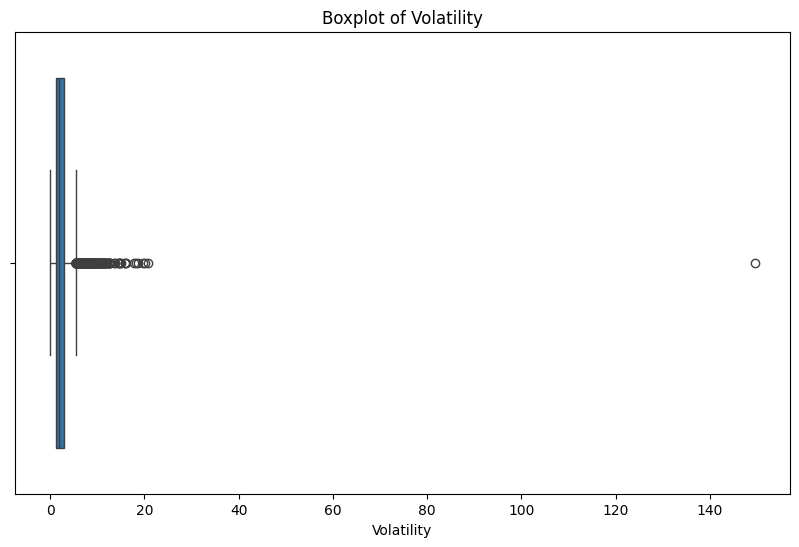

In [64]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Volatility'])
plt.title('Boxplot of Volatility')
plt.show()

<div class="alert alert-block alert-info">
    
### 4.3. Outlier Removal <a class="anchor" name="outlier"></a>

In [65]:
# Remove the outlier from the dataset
data_1 = data[data['Volatility'] <= 140]

# Check if the outlier has been removed
data_1.describe()

,Date,Open,Close,High,Low,Volume,Amount,Avg_Price,Return,Volatility,...,Net Income,Gross Profit,EPS,Total Assets,Total Liabilities,Total Equity,Cash and Cash Equivalents,Operating Cash Flow,Investing Cash Flow,Financing Cash Flow
count,13485,13485.000000,13485.000000,13485.000000,13485.000000,1.348500e+04,1.348500e+04,13485.000000,13485.000000,13485.000000,...,1.348500e+04,1.348500e+04,13485.000000,1.348500e+04,1.348500e+04,1.348500e+04,1.348500e+04,1.348500e+04,1.348500e+04,1.348500e+04
mean,2022-11-15 13:23:20.756396032,1741.457794,1735.496364,1829.791515,1638.032740,4.112671e+07,3.228331e+09,1733.325875,-0.735692,2.385218,...,7.171972e+08,2.858047e+09,1.949954,1.821746e+10,1.091795e+10,7.299389e+09,1.510134e+09,1.178100e+09,-7.026334e+08,-4.600378e+08
min,2022-01-01 00:00:00,0.011000,0.010000,0.011000,0.008000,4.210000e+02,1.746700e+04,0.010455,-84.347826,0.000000,...,-1.672000e+10,-2.746000e+09,-84.600000,1.410000e+07,2.479000e+06,-8.940000e+09,4.300000e+04,-4.109000e+09,-7.097000e+10,-6.976000e+10
25%,2022-06-01 00:00:00,22.710000,22.330000,24.750000,20.180000,3.882298e+06,1.125695e+08,22.499048,-6.912480,1.345397,...,-6.500000e+05,1.013000e+08,-0.050000,8.001000e+08,3.497000e+08,2.705000e+08,5.024000e+07,5.240000e+05,-2.516000e+08,-2.350000e+08
50%,2022-12-01 00:00:00,87.570000,86.650000,93.980000,81.395000,1.145424e+07,4.744810e+08,87.372381,-1.091008,1.979925,...,6.013000e+07,4.060000e+08,0.990000,2.858000e+09,1.556000e+09,9.851000e+08,1.861000e+08,8.319000e+07,-4.824000e+07,-2.264000e+07
75%,2023-05-01 00:00:00,356.520000,352.720000,377.200000,325.080000,3.204558e+07,2.097368e+09,351.293895,4.978386,3.000901,...,3.140000e+08,1.422000e+09,2.860000,9.482000e+09,6.084000e+09,3.111000e+09,5.940000e+08,4.442000e+08,-6.422000e+06,7.465000e+06
max,2023-10-01 00:00:00,402207.744000,403313.664000,408310.579000,394660.864000,2.908660e+09,6.206421e+11,402330.624000,192.222222,20.712825,...,8.948000e+10,2.252000e+11,52.470000,5.772000e+11,3.906000e+11,4.035000e+11,1.837000e+11,1.459000e+11,2.138000e+10,2.425000e+10
std,NaN,15565.422178,15629.224214,16211.582528,14951.084046,1.211129e+08,1.660651e+10,15574.028231,12.440052,1.591502,...,3.993596e+09,1.130116e+10,5.161492,5.717387e+10,3.217768e+10,2.944389e+10,7.989736e+09,5.928256e+09,3.328219e+09,3.485389e+09


<div class="alert alert-block alert-warning"> 

## 5. Feature Extraction  <a class="anchor" name="feature_ext"></a>

</div>


<div class="alert alert-block alert-info">
    
### 5.1. Creating Lagged Variables <a class="anchor" name="lagged"></a>

Lagged variables are previous values of a time-series feature that can be used to predict future values. We will be creating lagged versions of features like Open, Close, High, Low, Volume, etc., to capture temporal dependencies.

In [66]:
# Ignore all warnings
warnings.filterwarnings('ignore')

# Creating lagged features for the trading data
lagged_features = ['Open', 'Close', 'High', 'Low', 'Volume', 'Amount', 'Avg_Price', 'Return']

# Create lagged features for each stock separately
for feature in lagged_features:
    data_1[f'{feature}_lag1'] = data_1.groupby('Stock')[feature].shift(1)

In [67]:
# Drop rows with any NaN values
data_cleaned = data_1.dropna()

# Verify that all NaN values have been removed
nan_count_after = data_cleaned.isna().sum().sum()
print(f'Number of NaN values after cleaning: {nan_count_after}')

# Display the cleaned dataset
data_cleaned.head()

Number of NaN values after cleaning: 0


,Date,Open,Close,High,Low,Volume,Amount,Avg_Price,Return,Volatility,...,Financing Cash Flow,Stock,Open_lag1,Close_lag1,High_lag1,Low_lag1,Volume_lag1,Amount_lag1,Avg_Price_lag1,Return_lag1
1,2022-02-01,146.164,135.994,150.734,128.694,42313071,5.677741e+09,141.947684,-6.181271,2.117435,...,-546000000.0,A,164.634,144.954,165.074,136.849,40101533.0,5.732915e+09,148.347000,-12.188473
2,2022-03-01,136.464,137.964,145.834,132.534,46251907,6.205439e+09,139.889217,1.448593,2.072637,...,-546000000.0,A,146.164,135.994,150.734,128.694,42313071.0,5.677741e+09,141.947684,-6.181271
3,2022-04-01,139.814,125.114,142.924,123.084,43916920,5.566595e+09,132.867500,-9.314024,2.113012,...,-669000000.0,A,136.464,137.964,145.834,132.534,46251907.0,6.205439e+09,139.889217,1.448593
4,2022-05-01,124.224,133.404,136.614,118.484,45551962,5.564296e+09,127.519238,6.625957,2.746538,...,-669000000.0,A,139.814,125.114,142.924,123.084,43916920.0,5.566595e+09,132.867500,-9.314024
5,2022-06-01,133.704,124.614,137.044,118.364,35110239,4.202306e+09,126.180190,-6.589008,2.168207,...,-669000000.0,A,124.224,133.404,136.614,118.484,45551962.0,5.564296e+09,127.519238,6.625957


#### Submission Set:

- We also need to add these lagged features in our submission set.

In [68]:
# Filter the training data for the last available date (1/10/2023)
last_date_data = data_cleaned[data_cleaned['Date'] == '2023-10-01']

# Set the index to 'Stock' for easy lookup
last_date_data.set_index('Stock', inplace=True)

# Select the necessary columns for the lagged features
lagged_features = ['Open', 'Close', 'High', 'Low', 'Volume', 'Amount', 'Avg_Price', 'Return']
last_date_features = last_date_data[lagged_features]

# Set the index to 'Stock' for easy assignment
submission_data.set_index('Stock', inplace=True)

# Create lagged features for each stock using the values from 1/10/2023
for feature in lagged_features:
    submission_data[f'{feature}_lag1'] = submission_data.index.map(last_date_features[feature])

# Reset the index if necessary
submission_data.reset_index(inplace=True)


In [69]:
submission_data.head()

,Stock,Date,Volatility,Open_lag1,Close_lag1,High_lag1,Low_lag1,Volume_lag1,Amount_lag1,Avg_Price_lag1,Return_lag1
0,A,2023-11-01,0,118.064,110.534,120.994,103.964,46915700,5.070882e+09,115.912636,-6.925791
1,AAL,2023-11-01,0,5.647,5.017,5.744,4.909,956679200,1.129017e+10,5.263545,-10.982967
2,ABG,2023-11-01,0,232.335,193.295,234.820,180.320,3600557,7.302963e+08,207.778636,-16.681394
3,ABT,2023-11-01,0,16701.120,16611.520,17072.320,15987.392,154059545,1.454443e+10,16580.858182,-1.360518
4,ACA,2023-11-01,0,72.170,70.070,73.780,67.240,4550479,3.177441e+08,70.492273,-3.816060



<div class="alert alert-block alert-info">
    
### 5.2. Creating Features from 'Date' <a class="anchor" name="date"></a>

<div class="alert alert-block alert-success">
    
#### 5.2.1.  Extracting Ordinal Features <a class="anchor" name="ordinal_date"></a>
    
</div>

Extracting features such as the month, quarter, and year from the Date column.

In [19]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

# Extracting month, quarter, and year from the Date column
data_cleaned['Month'] = data_cleaned['Date'].dt.month
data_cleaned['Quarter'] = data_cleaned['Date'].dt.quarter
data_cleaned['Year'] = data_cleaned['Date'].dt.year

In [20]:
data_cleaned.head()

,Date,Open,Close,High,Low,Volume,Amount,Avg_Price,Return,Volatility,...,Close_lag1,High_lag1,Low_lag1,Volume_lag1,Amount_lag1,Avg_Price_lag1,Return_lag1,Month,Quarter,Year
1,2022-02-01,146.164,135.994,150.734,128.694,42313071,5.677741e+09,141.947684,-6.181271,2.117435,...,144.954,165.074,136.849,40101533.0,5.732915e+09,148.347000,-12.188473,2,1,2022
2,2022-03-01,136.464,137.964,145.834,132.534,46251907,6.205439e+09,139.889217,1.448593,2.072637,...,135.994,150.734,128.694,42313071.0,5.677741e+09,141.947684,-6.181271,3,1,2022
3,2022-04-01,139.814,125.114,142.924,123.084,43916920,5.566595e+09,132.867500,-9.314024,2.113012,...,137.964,145.834,132.534,46251907.0,6.205439e+09,139.889217,1.448593,4,2,2022
4,2022-05-01,124.224,133.404,136.614,118.484,45551962,5.564296e+09,127.519238,6.625957,2.746538,...,125.114,142.924,123.084,43916920.0,5.566595e+09,132.867500,-9.314024,5,2,2022
5,2022-06-01,133.704,124.614,137.044,118.364,35110239,4.202306e+09,126.180190,-6.589008,2.168207,...,133.404,136.614,118.484,45551962.0,5.564296e+09,127.519238,6.625957,6,2,2022


#### Submission Set:

In [70]:
# Ignore all warnings
warnings.filterwarnings('ignore')

# Convert Date to datetime format
submission_data['Date'] = pd.to_datetime(submission_data['Date'])

# Extracting month, quarter, and year from the Date column
submission_data['Month'] = submission_data['Date'].dt.month
submission_data['Quarter'] = submission_data['Date'].dt.quarter
submission_data['Year'] = submission_data['Date'].dt.year

submission_data.head()

,Stock,Date,Volatility,Open_lag1,Close_lag1,High_lag1,Low_lag1,Volume_lag1,Amount_lag1,Avg_Price_lag1,Return_lag1,Month,Quarter,Year
0,A,2023-11-01,0,118.064,110.534,120.994,103.964,46915700,5.070882e+09,115.912636,-6.925791,11,4,2023
1,AAL,2023-11-01,0,5.647,5.017,5.744,4.909,956679200,1.129017e+10,5.263545,-10.982967,11,4,2023
2,ABG,2023-11-01,0,232.335,193.295,234.820,180.320,3600557,7.302963e+08,207.778636,-16.681394,11,4,2023
3,ABT,2023-11-01,0,16701.120,16611.520,17072.320,15987.392,154059545,1.454443e+10,16580.858182,-1.360518,11,4,2023
4,ACA,2023-11-01,0,72.170,70.070,73.780,67.240,4550479,3.177441e+08,70.492273,-3.816060,11,4,2023


<div class="alert alert-block alert-success">
    
#### 5.2.2.  Creating Cyclical Features <a class="anchor" name="cyclic_date"></a>
    
</div>

To capture the cyclical nature of time (e.g., months of the year), we will convert the month into cyclical features using sine and cosine transformations. This is particularly useful when dealing with periodic patterns.

In [21]:
import numpy as np

# Creating cyclical features for the month
data_cleaned['Month_sin'] = np.sin(2 * np.pi * data_cleaned['Month'] / 12)
data_cleaned['Month_cos'] = np.cos(2 * np.pi * data_cleaned['Month'] / 12)

# Similarly, we will create cyclical features for the quarter
data_cleaned['Quarter_sin'] = np.sin(2 * np.pi * data_cleaned['Quarter'] / 4)
data_cleaned['Quarter_cos'] = np.cos(2 * np.pi * data_cleaned['Quarter'] / 4)

In [22]:
data_cleaned.head()

,Date,Open,Close,High,Low,Volume,Amount,Avg_Price,Return,Volatility,...,Amount_lag1,Avg_Price_lag1,Return_lag1,Month,Quarter,Year,Month_sin,Month_cos,Quarter_sin,Quarter_cos
1,2022-02-01,146.164,135.994,150.734,128.694,42313071,5.677741e+09,141.947684,-6.181271,2.117435,...,5.732915e+09,148.347000,-12.188473,2,1,2022,8.660254e-01,5.000000e-01,1.000000e+00,6.123234e-17
2,2022-03-01,136.464,137.964,145.834,132.534,46251907,6.205439e+09,139.889217,1.448593,2.072637,...,5.677741e+09,141.947684,-6.181271,3,1,2022,1.000000e+00,6.123234e-17,1.000000e+00,6.123234e-17
3,2022-04-01,139.814,125.114,142.924,123.084,43916920,5.566595e+09,132.867500,-9.314024,2.113012,...,6.205439e+09,139.889217,1.448593,4,2,2022,8.660254e-01,-5.000000e-01,1.224647e-16,-1.000000e+00
4,2022-05-01,124.224,133.404,136.614,118.484,45551962,5.564296e+09,127.519238,6.625957,2.746538,...,5.566595e+09,132.867500,-9.314024,5,2,2022,5.000000e-01,-8.660254e-01,1.224647e-16,-1.000000e+00
5,2022-06-01,133.704,124.614,137.044,118.364,35110239,4.202306e+09,126.180190,-6.589008,2.168207,...,5.564296e+09,127.519238,6.625957,6,2,2022,1.224647e-16,-1.000000e+00,1.224647e-16,-1.000000e+00


#### Submission Set:

In [71]:
# Creating cyclical features for the month
submission_data['Month_sin'] = np.sin(2 * np.pi * submission_data['Month'] / 12)
submission_data['Month_cos'] = np.cos(2 * np.pi * submission_data['Month'] / 12)

# Similarly, we will create cyclical features for the quarter
submission_data['Quarter_sin'] = np.sin(2 * np.pi * submission_data['Quarter'] / 4)
submission_data['Quarter_cos'] = np.cos(2 * np.pi * submission_data['Quarter'] / 4)

submission_data.head()

,Stock,Date,Volatility,Open_lag1,Close_lag1,High_lag1,Low_lag1,Volume_lag1,Amount_lag1,Avg_Price_lag1,Return_lag1,Month,Quarter,Year,Month_sin,Month_cos,Quarter_sin,Quarter_cos
0,A,2023-11-01,0,118.064,110.534,120.994,103.964,46915700,5.070882e+09,115.912636,-6.925791,11,4,2023,-0.5,0.866025,-2.449294e-16,1.0
1,AAL,2023-11-01,0,5.647,5.017,5.744,4.909,956679200,1.129017e+10,5.263545,-10.982967,11,4,2023,-0.5,0.866025,-2.449294e-16,1.0
2,ABG,2023-11-01,0,232.335,193.295,234.820,180.320,3600557,7.302963e+08,207.778636,-16.681394,11,4,2023,-0.5,0.866025,-2.449294e-16,1.0
3,ABT,2023-11-01,0,16701.120,16611.520,17072.320,15987.392,154059545,1.454443e+10,16580.858182,-1.360518,11,4,2023,-0.5,0.866025,-2.449294e-16,1.0
4,ACA,2023-11-01,0,72.170,70.070,73.780,67.240,4550479,3.177441e+08,70.492273,-3.816060,11,4,2023,-0.5,0.866025,-2.449294e-16,1.0


<div class="alert alert-block alert-success">
    
#### 5.2.3.  Creating Term End Features <a class="anchor" name="term_date"></a>
    
</div>

Quarter ends typically occur in March, June, September, and December. We will create a binary feature that indicates whether a given date falls at the end of a quarter.

In [23]:
# Create the 'Is Quarter End' feature
data_cleaned['Is_Quarter_End'] = data_cleaned['Month'].isin([3, 6, 9, 12]).astype(int)

The fiscal year end is often at the end of December (Month 12), but this can vary depending on the company's fiscal year. For simplicity, let's assume the fiscal year ends in December.

In [24]:
# Create the 'Is Fiscal Year End' feature
data_cleaned['Is_Fiscal_Year_End'] = (data_cleaned['Month'] == 12).astype(int)

#### Submission Data:


In [72]:
# Create the 'Is Quarter End' feature
submission_data['Is_Quarter_End'] = submission_data['Month'].isin([3, 6, 9, 12]).astype(int)

# Create the 'Is Fiscal Year End' feature
submission_data['Is_Fiscal_Year_End'] = (submission_data['Month'] == 12).astype(int)

submission_data.head()

,Stock,Date,Volatility,Open_lag1,Close_lag1,High_lag1,Low_lag1,Volume_lag1,Amount_lag1,Avg_Price_lag1,Return_lag1,Month,Quarter,Year,Month_sin,Month_cos,Quarter_sin,Quarter_cos,Is_Quarter_End,Is_Fiscal_Year_End
0,A,2023-11-01,0,118.064,110.534,120.994,103.964,46915700,5.070882e+09,115.912636,-6.925791,11,4,2023,-0.5,0.866025,-2.449294e-16,1.0,0,0
1,AAL,2023-11-01,0,5.647,5.017,5.744,4.909,956679200,1.129017e+10,5.263545,-10.982967,11,4,2023,-0.5,0.866025,-2.449294e-16,1.0,0,0
2,ABG,2023-11-01,0,232.335,193.295,234.820,180.320,3600557,7.302963e+08,207.778636,-16.681394,11,4,2023,-0.5,0.866025,-2.449294e-16,1.0,0,0
3,ABT,2023-11-01,0,16701.120,16611.520,17072.320,15987.392,154059545,1.454443e+10,16580.858182,-1.360518,11,4,2023,-0.5,0.866025,-2.449294e-16,1.0,0,0
4,ACA,2023-11-01,0,72.170,70.070,73.780,67.240,4550479,3.177441e+08,70.492273,-3.816060,11,4,2023,-0.5,0.866025,-2.449294e-16,1.0,0,0



<div class="alert alert-block alert-info">
    
### 5.3. Creating Binned Features <a class="anchor" name="binned"></a>

We will determine the company size by the amount of `Assets` owned by the company in three categories; Small, Medium, and Large.

In [26]:
# Example of creating bins using quantiles (percentiles)
bins = [data_cleaned['Total Assets'].min(), 
        data_cleaned['Total Assets'].quantile(0.33), 
        data_cleaned['Total Assets'].quantile(0.66), 
        data_cleaned['Total Assets'].max()]

# Labels for the bins
labels = ['Small', 'Medium', 'Large']

# Create the 'Company Size' feature
data_cleaned['Company_Size'] = pd.cut(data_cleaned['Total Assets'], bins=bins, labels=labels, include_lowest=True)


Similarly, we will categorize Revenue and Net Income.

In [27]:
# Binning Revenue into categories
bins = [data_cleaned['Revenue'].min(), 
        data_cleaned['Revenue'].quantile(0.33), 
        data_cleaned['Revenue'].quantile(0.66), 
        data_cleaned['Revenue'].max()]

labels = ['Low Revenue', 'Medium Revenue', 'High Revenue']

data_cleaned['Revenue_Category'] = pd.cut(data_cleaned['Revenue'], bins=bins, labels=labels, include_lowest=True)

# Binning Net Income into profitability categories
bins = [data_cleaned['Net Income'].min(), 
        0,  # Separate loss-making and profit-making companies
        data_cleaned['Net Income'].quantile(0.5), 
        data_cleaned['Net Income'].max()]

labels = ['Loss', 'Low Profit', 'High Profit']

data_cleaned['Profitability_Category'] = pd.cut(data_cleaned['Net Income'], bins=bins, labels=labels, include_lowest=True)


In [28]:
# Check the distribution of the new categorical features
print(data_cleaned['Company_Size'].value_counts())
print(data_cleaned['Revenue_Category'].value_counts())
print(data_cleaned['Profitability_Category'].value_counts())

# Display the first few rows of the updated dataset
data_cleaned.head()


Company_Size
Large     4377
Small     4252
Medium    4243
Name: count, dtype: int64
Revenue_Category
High Revenue      4376
Low Revenue       4251
Medium Revenue    4245
Name: count, dtype: int64
Profitability_Category
High Profit    6435
Loss           3341
Low Profit     3096
Name: count, dtype: int64


,Date,Open,Close,High,Low,Volume,Amount,Avg_Price,Return,Volatility,...,Year,Month_sin,Month_cos,Quarter_sin,Quarter_cos,Is_Quarter_End,Is_Fiscal_Year_End,Company_Size,Revenue_Category,Profitability_Category
1,2022-02-01,146.164,135.994,150.734,128.694,42313071,5.677741e+09,141.947684,-6.181271,2.117435,...,2022,8.660254e-01,5.000000e-01,1.000000e+00,6.123234e-17,0,0,Large,Medium Revenue,High Profit
2,2022-03-01,136.464,137.964,145.834,132.534,46251907,6.205439e+09,139.889217,1.448593,2.072637,...,2022,1.000000e+00,6.123234e-17,1.000000e+00,6.123234e-17,1,0,Large,Medium Revenue,High Profit
3,2022-04-01,139.814,125.114,142.924,123.084,43916920,5.566595e+09,132.867500,-9.314024,2.113012,...,2022,8.660254e-01,-5.000000e-01,1.224647e-16,-1.000000e+00,0,0,Large,High Revenue,High Profit
4,2022-05-01,124.224,133.404,136.614,118.484,45551962,5.564296e+09,127.519238,6.625957,2.746538,...,2022,5.000000e-01,-8.660254e-01,1.224647e-16,-1.000000e+00,0,0,Large,High Revenue,High Profit
5,2022-06-01,133.704,124.614,137.044,118.364,35110239,4.202306e+09,126.180190,-6.589008,2.168207,...,2022,1.224647e-16,-1.000000e+00,1.224647e-16,-1.000000e+00,1,0,Large,High Revenue,High Profit


#### Submission Set:

- Notice that the features such as 'Revenue', 'Net Income', 'Gross Profit', etc., are either quarterly updated or annually. 

- In either case these features would be same as that in the labled set for the previous month October, as November is included in the same quarterly period.

In [74]:
# Filter the training data for the last available date (1/10/2023)
latest_quarter_data = data_cleaned[data_cleaned['Date'] == '2023-10-01']

# Set the index to 'Stock' for easy lookup
latest_quarter_data.set_index('Stock', inplace=True)

# Select the financial features that need to be updated in the submission dataset
financial_features = ['Revenue', 'Net Income', 'Gross Profit', 'EPS', 'Total Assets', 
                      'Total Liabilities', 'Total Equity', 'Cash and Cash Equivalents', 
                      'Operating Cash Flow', 'Investing Cash Flow', 'Financing Cash Flow']

# Set the index to 'Stock' for easy assignment
submission_data.set_index('Stock', inplace=True)

# Update the submission dataset with the values from 1/10/2023
for feature in financial_features:
    submission_data[feature] = submission_data.index.map(latest_quarter_data[feature])

# Reset the index if necessary
submission_data.reset_index(inplace=True)

# Display the updated submission data to verify the changes
submission_data.head()


,Stock,Date,Volatility,Open_lag1,Close_lag1,High_lag1,Low_lag1,Volume_lag1,Amount_lag1,Avg_Price_lag1,...,Net Income,Gross Profit,EPS,Total Assets,Total Liabilities,Total Equity,Cash and Cash Equivalents,Operating Cash Flow,Investing Cash Flow,Financing Cash Flow
0,A,2023-11-01,0,118.064,110.534,120.994,103.964,46915700,5.070882e+09,115.912636,...,1.240000e+09,3.465000e+09,4.22,1.076000e+10,4.918000e+09,5.845000e+09,1.590000e+09,1.772000e+09,-3.100000e+08,-9.300000e+08
1,AAL,2023-11-01,0,5.647,5.017,5.744,4.909,956679200,1.129017e+10,5.263545,...,8.030000e+08,1.064000e+10,1.23,6.571000e+10,7.085000e+10,-5.136000e+09,5.770000e+08,5.154000e+09,-2.661000e+09,-2.392000e+09
2,ABG,2023-11-01,0,232.335,193.295,234.820,180.320,3600557,7.302963e+08,207.778636,...,5.470000e+08,2.083000e+09,26.02,8.255000e+09,5.007000e+09,3.249000e+09,4.160000e+07,2.398000e+08,-9.040000e+07,-3.431000e+08
3,ABT,2023-11-01,0,16701.120,16611.520,17072.320,15987.392,154059545,1.454443e+10,16580.858182,...,4.129000e+09,1.645000e+10,2.36,7.209000e+10,3.440000e+10,3.769000e+10,6.709000e+09,4.223000e+09,-2.309000e+09,-5.039000e+09
4,ACA,2023-11-01,0,72.170,70.070,73.780,67.240,4550479,3.177441e+08,70.492273,...,1.321000e+08,3.368000e+08,2.71,3.490000e+09,1.174000e+09,2.315000e+09,1.553000e+08,1.988000e+08,-1.315000e+08,-7.240000e+07


In [75]:
# Example of creating bins using quantiles (percentiles)
bins = [submission_data['Total Assets'].min(), 
        submission_data['Total Assets'].quantile(0.33), 
        submission_data['Total Assets'].quantile(0.66), 
        submission_data['Total Assets'].max()]

# Labels for the bins
labels = ['Small', 'Medium', 'Large']

# Create the 'Company Size' feature
submission_data['Company_Size'] = pd.cut(submission_data['Total Assets'], bins=bins, labels=labels, include_lowest=True)

# Binning Revenue into categories
bins = [submission_data['Revenue'].min(), 
        submission_data['Revenue'].quantile(0.33), 
        submission_data['Revenue'].quantile(0.66), 
        submission_data['Revenue'].max()]

labels = ['Low Revenue', 'Medium Revenue', 'High Revenue']

data_cleaned['Revenue_Category'] = pd.cut(submission_data['Revenue'], bins=bins, labels=labels, include_lowest=True)

# Binning Net Income into profitability categories
bins = [submission_data['Net Income'].min(), 
        0,  # Separate loss-making and profit-making companies
        submission_data['Net Income'].quantile(0.5), 
        submission_data['Net Income'].max()]

labels = ['Loss', 'Low Profit', 'High Profit']

submission_data['Profitability_Category'] = pd.cut(submission_data['Net Income'], bins=bins, labels=labels, include_lowest=True)

submission_data.head()

,Stock,Date,Volatility,Open_lag1,Close_lag1,High_lag1,Low_lag1,Volume_lag1,Amount_lag1,Avg_Price_lag1,...,EPS,Total Assets,Total Liabilities,Total Equity,Cash and Cash Equivalents,Operating Cash Flow,Investing Cash Flow,Financing Cash Flow,Company_Size,Profitability_Category
0,A,2023-11-01,0,118.064,110.534,120.994,103.964,46915700,5.070882e+09,115.912636,...,4.22,1.076000e+10,4.918000e+09,5.845000e+09,1.590000e+09,1.772000e+09,-3.100000e+08,-9.300000e+08,Large,High Profit
1,AAL,2023-11-01,0,5.647,5.017,5.744,4.909,956679200,1.129017e+10,5.263545,...,1.23,6.571000e+10,7.085000e+10,-5.136000e+09,5.770000e+08,5.154000e+09,-2.661000e+09,-2.392000e+09,Large,High Profit
2,ABG,2023-11-01,0,232.335,193.295,234.820,180.320,3600557,7.302963e+08,207.778636,...,26.02,8.255000e+09,5.007000e+09,3.249000e+09,4.160000e+07,2.398000e+08,-9.040000e+07,-3.431000e+08,Large,High Profit
3,ABT,2023-11-01,0,16701.120,16611.520,17072.320,15987.392,154059545,1.454443e+10,16580.858182,...,2.36,7.209000e+10,3.440000e+10,3.769000e+10,6.709000e+09,4.223000e+09,-2.309000e+09,-5.039000e+09,Large,High Profit
4,ACA,2023-11-01,0,72.170,70.070,73.780,67.240,4550479,3.177441e+08,70.492273,...,2.71,3.490000e+09,1.174000e+09,2.315000e+09,1.553000e+08,1.988000e+08,-1.315000e+08,-7.240000e+07,Medium,High Profit



<div class="alert alert-block alert-info">
    
### 5.4. Dropping Future Predictors <a class="anchor" name="future"></a>

The columns `Open`, `Close`, `High`, etc., rely on the future predictive data that may not be available to predict volatility for the next month, so we will drop them. We will also drop the `Date` column as it is redundant now.

In [29]:
# List of columns to drop
columns_to_drop = ['Date', 'Open', 'Close', 'High', 'Low', 'Volume', 'Amount', 'Avg_Price', 'Return']  # Replace with your column names

# Drop the specified columns
data_selected = data_cleaned.drop(columns=columns_to_drop)

# Display the DataFrame to verify
data_selected.head()


,Volatility,Revenue,Net Income,Gross Profit,EPS,Total Assets,Total Liabilities,Total Equity,Cash and Cash Equivalents,Operating Cash Flow,...,Year,Month_sin,Month_cos,Quarter_sin,Quarter_cos,Is_Quarter_End,Is_Fiscal_Year_End,Company_Size,Revenue_Category,Profitability_Category
1,2.117435,1.674000e+09,283000000.0,9.100000e+08,0.94,1.033000e+10,5.173000e+09,5.154000e+09,1.113000e+09,255000000.0,...,2022,8.660254e-01,5.000000e-01,1.000000e+00,6.123234e-17,0,0,Large,Medium Revenue,High Profit
2,2.072637,1.674000e+09,283000000.0,9.100000e+08,0.94,1.033000e+10,5.173000e+09,5.154000e+09,1.113000e+09,255000000.0,...,2022,1.000000e+00,6.123234e-17,1.000000e+00,6.123234e-17,1,0,Large,Medium Revenue,High Profit
3,2.113012,3.281000e+09,557000000.0,1.771000e+09,1.86,1.046000e+10,5.333000e+09,5.122000e+09,1.186000e+09,538000000.0,...,2022,8.660254e-01,-5.000000e-01,1.224647e-16,-1.000000e+00,0,0,Large,High Revenue,High Profit
4,2.746538,3.281000e+09,557000000.0,1.771000e+09,1.86,1.046000e+10,5.333000e+09,5.122000e+09,1.186000e+09,538000000.0,...,2022,5.000000e-01,-8.660254e-01,1.224647e-16,-1.000000e+00,0,0,Large,High Revenue,High Profit
5,2.168207,3.281000e+09,557000000.0,1.771000e+09,1.86,1.046000e+10,5.333000e+09,5.122000e+09,1.186000e+09,538000000.0,...,2022,1.224647e-16,-1.000000e+00,1.224647e-16,-1.000000e+00,1,0,Large,High Revenue,High Profit


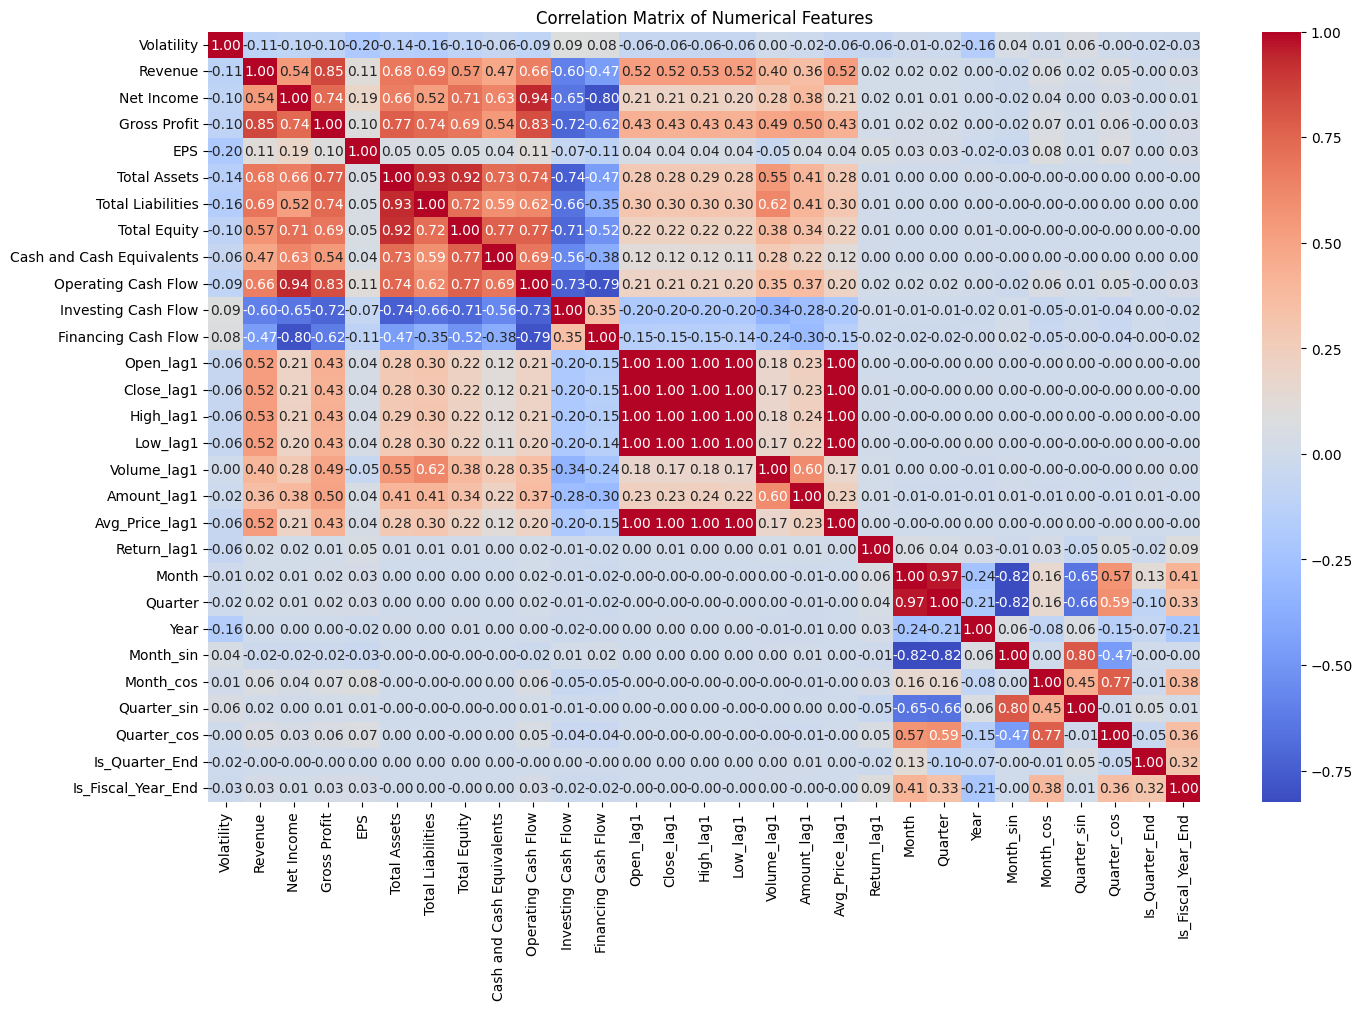

In [30]:
# Filter the DataFrame to include only numerical columns
numerical_data = data_selected.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


<div class="alert alert-block alert-info">
    
### 5.5. Adding Transformed Features <a class="anchor" name="transformed"></a>

We will create new variables that are created by taking log transformations to unskew the data features forced by the high values.

In [31]:
# List of features for log transformation
log_transform_features = [
    'Revenue', 'Total Assets', 'Total Liabilities',
    'Amount_lag1', 'High_lag1', 'Low_lag1', 'Close_lag1', 'Open_lag1', 'Avg_Price_lag1'
]

# Applying log transformation to the selected features
for feature in log_transform_features:
    # Adding a small constant to avoid log(0) errors
    data_selected[f'{feature}_log'] = np.log1p(data_selected[feature])

#### Submission Set:

In [76]:
# Applying log transformation
for feature in log_transform_features:
    # Adding a small constant to avoid log(0) errors
    submission_data[f'{feature}_log'] = np.log1p(submission_data[feature])

submission_data.head()

,Stock,Date,Volatility,Open_lag1,Close_lag1,High_lag1,Low_lag1,Volume_lag1,Amount_lag1,Avg_Price_lag1,...,Profitability_Category,Revenue_log,Total Assets_log,Total Liabilities_log,Amount_lag1_log,High_lag1_log,Low_lag1_log,Close_lag1_log,Open_lag1_log,Avg_Price_lag1_log
0,A,2023-11-01,0,118.064,110.534,120.994,103.964,46915700,5.070882e+09,115.912636,...,High Profit,22.645030,23.099101,22.316168,22.346781,4.803972,4.653617,4.714329,4.779661,4.761427
1,AAL,2023-11-01,0,5.647,5.017,5.744,4.909,956679200,1.129017e+10,5.263545,...,High Profit,24.405372,24.908517,24.983831,23.147198,1.908653,1.776477,1.794589,1.894166,1.834746
2,ABG,2023-11-01,0,232.335,193.295,234.820,180.320,3600557,7.302963e+08,207.778636,...,High Profit,23.120252,22.834085,22.334103,20.408961,5.463069,5.200263,5.269378,5.452475,5.341275
3,ABT,2023-11-01,0,16701.120,16611.520,17072.320,15987.392,154059545,1.454443e+10,16580.858182,...,High Profit,24.120120,25.001181,24.261322,23.400474,9.745272,9.679618,9.717912,9.723291,9.716064
4,ACA,2023-11-01,0,72.170,70.070,73.780,67.240,4550479,3.177441e+08,70.492273,...,High Profit,21.269072,21.973168,20.883683,19.576757,4.314550,4.223031,4.263665,4.292786,4.269589


Now we will create some squared and cubic features to better evaluate the relationships of the variables and their impact on our label.

In [32]:
# List of features for squared and cubic transformation
squared_cubic_features = [
    'Return_lag1', 'EPS', 'Avg_Price_lag1', 'Open_lag1', 'Close_lag1',
    'High_lag1', 'Low_lag1'
]

# Applying squared and cubic transformations
for feature in squared_cubic_features:
    data_selected[f'{feature}_squared'] = np.square(data_selected[feature])
    data_selected[f'{feature}_cubed'] = np.power(data_selected[feature], 3)

# Display the first few rows to verify the new features
data_selected.head()

,Volatility,Revenue,Net Income,Gross Profit,EPS,Total Assets,Total Liabilities,Total Equity,Cash and Cash Equivalents,Operating Cash Flow,...,Avg_Price_lag1_squared,Avg_Price_lag1_cubed,Open_lag1_squared,Open_lag1_cubed,Close_lag1_squared,Close_lag1_cubed,High_lag1_squared,High_lag1_cubed,Low_lag1_squared,Low_lag1_cubed
1,2.117435,1.674000e+09,283000000.0,9.100000e+08,0.94,1.033000e+10,5.173000e+09,5.154000e+09,1.113000e+09,255000000.0,...,22006.832409,3.264648e+06,27104.353956,4.462298e+06,21011.662116,3.045724e+06,27249.425476,4.498172e+06,18727.648801,2.562860e+06
2,2.072637,1.674000e+09,283000000.0,9.100000e+08,0.94,1.033000e+10,5.173000e+09,5.154000e+09,1.113000e+09,255000000.0,...,20149.145053,2.860124e+06,21363.914896,3.122635e+06,18494.368036,2.515123e+06,22720.738756,3.424788e+06,16562.145636,2.131449e+06
3,2.113012,3.281000e+09,557000000.0,1.771000e+09,1.86,1.046000e+10,5.333000e+09,5.122000e+09,1.186000e+09,538000000.0,...,19568.993142,2.737491e+06,18622.423296,2.541290e+06,19034.065296,2.626016e+06,21267.555556,3.101533e+06,17565.261156,2.327994e+06
4,2.746538,3.281000e+09,557000000.0,1.771000e+09,1.86,1.046000e+10,5.333000e+09,5.122000e+09,1.186000e+09,538000000.0,...,17653.772556,2.345613e+06,19547.954596,2.733078e+06,15653.512996,1.958474e+06,20427.269776,2.919547e+06,15149.671056,1.864682e+06
5,2.168207,3.281000e+09,557000000.0,1.771000e+09,1.86,1.046000e+10,5.333000e+09,5.122000e+09,1.186000e+09,538000000.0,...,16261.156084,2.073610e+06,15431.602176,1.916975e+06,17796.627216,2.374141e+06,18663.384996,2.549680e+06,14038.458256,1.663333e+06


#### Submission Set:

In [77]:
# Applying squared and cubic transformations
for feature in squared_cubic_features:
    submission_data[f'{feature}_squared'] = np.square(submission_data[feature])
    submission_data[f'{feature}_cubed'] = np.power(submission_data[feature], 3)

# Display the first few rows to verify the new features
submission_data.head()

,Stock,Date,Volatility,Open_lag1,Close_lag1,High_lag1,Low_lag1,Volume_lag1,Amount_lag1,Avg_Price_lag1,...,Avg_Price_lag1_squared,Avg_Price_lag1_cubed,Open_lag1_squared,Open_lag1_cubed,Close_lag1_squared,Close_lag1_cubed,High_lag1_squared,High_lag1_cubed,Low_lag1_squared,Low_lag1_cubed
0,A,2023-11-01,0,118.064,110.534,120.994,103.964,46915700,5.070882e+09,115.912636,...,1.343574e+04,1.557372e+06,1.393911e+04,1.645707e+06,1.221777e+04,1.350478e+06,1.463955e+04,1.771297e+06,1.080851e+04,1.123696e+06
1,AAL,2023-11-01,0,5.647,5.017,5.744,4.909,956679200,1.129017e+10,5.263545,...,2.770491e+01,1.458261e+02,3.188861e+01,1.800750e+02,2.517029e+01,1.262793e+02,3.299354e+01,1.895149e+02,2.409828e+01,1.182985e+02
2,ABG,2023-11-01,0,232.335,193.295,234.820,180.320,3600557,7.302963e+08,207.778636,...,4.317196e+04,8.970211e+06,5.397955e+04,1.254134e+07,3.736296e+04,7.222073e+06,5.514043e+04,1.294808e+07,3.251530e+04,5.863159e+06
3,ABT,2023-11-01,0,16701.120,16611.520,17072.320,15987.392,154059545,1.454443e+10,16580.858182,...,2.749249e+08,4.558490e+12,2.789274e+08,4.658400e+12,2.759426e+08,4.583826e+12,2.914641e+08,4.975969e+12,2.555967e+08,4.086325e+12
4,ACA,2023-11-01,0,72.170,70.070,73.780,67.240,4550479,3.177441e+08,70.492273,...,4.969161e+03,3.502874e+05,5.208509e+03,3.758981e+05,4.909805e+03,3.440300e+05,5.443488e+03,4.016206e+05,4.521218e+03,3.040067e+05


<div class="alert alert-block alert-warning"> 

## 6. Feature Selection and Model Evaluation  <a class="anchor" name="feature_sel"></a>

</div>


<div class="alert alert-block alert-info">
    
### 6.1. Ridge Regression <a class="anchor" name="ridge"></a>

<div class="alert alert-block alert-success">
    
#### 6.1.1.  Train-Test Split and Cross-Validation <a class="anchor" name="ridge_split"></a>
    
</div>

We'll still split the data into training and testing sets and we'll perform cross-validation within the training set to estimate the RMSE.

In [33]:
from sklearn.model_selection import train_test_split, KFold

# Split the data into training and testing sets
X = data_selected.drop('Volatility', axis=1)
y = data_selected['Volatility']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KFold with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)


<div class="alert alert-block alert-success">
    
#### 6.1.2. Create the Pipeline with 10-Fold Cross-Validation <a class="ridge_pipeline" name="func"></a>
    
</div>

We'll now create an ML pipeline that includes one-hot encoding, scaling, and Ridge Regression with cross-validation.

In [102]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# Create column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ])

# Define a range of alphas (lambdas) to test
alphas = np.logspace(-2, 2, 100)  # This tests alphas from 0.001 to 1000
# Initialize a list to store RMSE for each alpha across all folds
rmse_scores = []

# Perform 10-fold cross-validation manually to compute RMSE for each alpha
for alpha in alphas:
    fold_rmse = []
    for train_idx, val_idx in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        # Create pipeline for each fold
        ridge_pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('ridge', Ridge(alpha=alpha))
        ])
        
        # Fit the model
        ridge_pipeline.fit(X_train_fold, y_train_fold)
        
        # Predict and calculate RMSE for the validation fold
        y_val_pred = ridge_pipeline.predict(X_val_fold)
        fold_rmse.append(np.sqrt(mean_squared_error(y_val_fold, y_val_pred)))
    
    # Average RMSE for this alpha
    rmse_scores.append(np.mean(fold_rmse))

# Find the best alpha based on RMSE
best_alpha_ridge = alphas[np.argmin(rmse_scores)]
print(f"Best lambda (alpha) based on cross-validation: {best_alpha_ridge}")


Best lambda (alpha) based on cross-validation: 0.8697490026177834


<div class="alert alert-block alert-success">
    
#### 6.1.3.  Plot RMSE Against Lambda <a class="anchor" name="graph_ridge"></a>
    
</div>

We’ll plot the RMSE against different values of `lambda` to visualize the model performance.

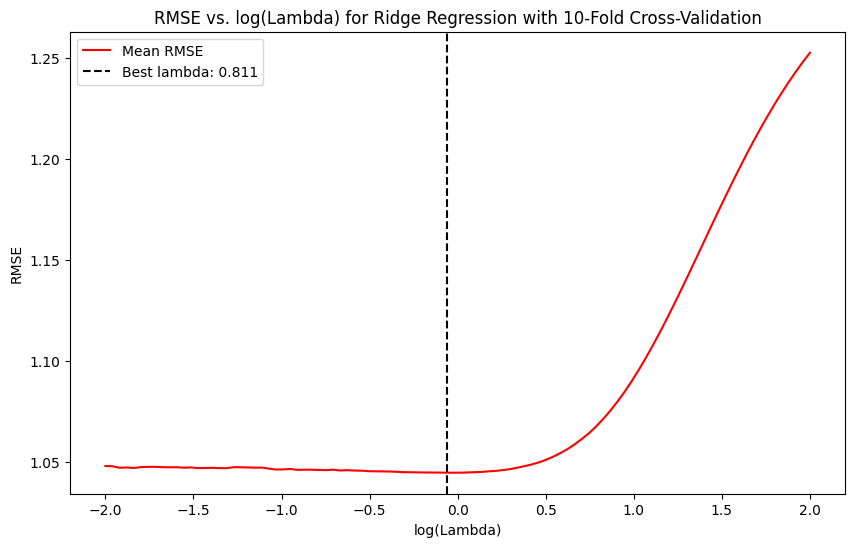

In [103]:
import matplotlib.pyplot as plt

# Plot RMSE against the log of alphas
plt.figure(figsize=(10, 6))
plt.plot(np.log10(alphas), rmse_scores, color='red', label='Mean RMSE')
plt.axvline(np.log10(best_alpha_ridge), linestyle='--', color='black', label=f'Best lambda: {best_alpha:.3f}')
plt.xlabel('log(Lambda)')
plt.ylabel('RMSE')
plt.title('RMSE vs. log(Lambda) for Ridge Regression with 10-Fold Cross-Validation')
plt.legend()
plt.show()


<div class="alert alert-block alert-success">
    
#### 6.1.4.  Evaluate the Final Model on the Test Data <a class="anchor" name="ridge_eval"></a>
    
</div>

Now, we’ll evaluate the final model using the best lambda on the test set.

In [104]:
from sklearn.model_selection import cross_val_score

# Create the final pipeline with the best alpha
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', Ridge(alpha=best_alpha_ridge))
])

# Perform 10-fold cross-validation on the entire dataset to evaluate the final model
final_cv_scores = cross_val_score(final_pipeline, X, y, cv=kf, scoring='neg_mean_squared_error')

# Compute the mean RMSE across all folds
final_mean_rmse_ridge = np.mean(np.sqrt(-final_cv_scores))
print(f"Final Mean RMSE across 10 folds: {final_mean_rmse_ridge:.3f}")


Final Mean RMSE across 10 folds: 1.038


<div class="alert alert-block alert-success">
    
#### 6.1.5.  Feature Importance <a class="anchor" name="ridge_feature"></a>
    
</div>

We can still examine the most important features.

In [106]:
# Fit the final pipeline to the entire dataset
final_pipeline.fit(X, y)

# Get the feature names after one-hot encoding
feature_names = final_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Extract the coefficients from the trained Ridge model
coefficients = final_pipeline.named_steps['ridge'].coef_

# Combine feature names with their coefficients
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort by absolute value of coefficient
feature_importance = feature_importance.reindex(feature_importance['Coefficient'].abs().sort_values(ascending=False).index)

# Display the most important features
print(feature_importance.head(10))


                Feature  Coefficient
182     cat__Stock_CVNA     5.579904
28    num__Low_lag1_log    -4.354531
134     cat__Stock_CDLX     3.664741
602     cat__Stock_TWOU     2.916579
269      cat__Stock_GDS     2.911829
622     cat__Stock_VNET     2.853492
519     cat__Stock_SBLK    -2.526102
368     cat__Stock_LPSN     2.434768
27   num__High_lag1_log     2.371745
364     cat__Stock_LOAN    -2.344163



<div class="alert alert-block alert-info">
    
### 6.2. Lasso Regression <a class="anchor" name="lasso"></a>

<div class="alert alert-block alert-success">
    
#### 6.1.1.  Train-Test Split and Cross-Validation <a class="anchor" name="ridge_split"></a>
    
</div>

<div class="alert alert-block alert-success">
    
#### 6.2.1.  Set Up the Pipeline <a class="anchor" name="lasso_pipeline"></a>
    
</div>

In [107]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# Create column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ])

# Define a range of alphas (lambdas) to test
alphas = np.logspace(-2, 1, 100)  # This tests alphas from 0.001 to 1000

# Initialize a list to store RMSE for each alpha across all folds
rmse_scores = []

# Initialize KFold with 10 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform 10-fold cross-validation manually to compute RMSE for each alpha
for alpha in alphas:
    fold_rmse = []
    for train_idx, val_idx in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        # Create pipeline for each fold
        lasso_pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('lasso', Lasso(alpha=alpha, max_iter=10000))
        ])
        
        # Fit the model
        lasso_pipeline.fit(X_train_fold, y_train_fold)
        
        # Predict and calculate RMSE for the validation fold
        y_val_pred = lasso_pipeline.predict(X_val_fold)
        fold_rmse.append(np.sqrt(mean_squared_error(y_val_fold, y_val_pred)))
    
    # Average RMSE for this alpha
    rmse_scores.append(np.mean(fold_rmse))

# Find the best alpha based on RMSE
best_alpha_lasso = alphas[np.argmin(rmse_scores)]
print(f"Best lambda (alpha) based on cross-validation: {best_alpha_lasso}")


Best lambda (alpha) based on cross-validation: 0.01


<div class="alert alert-block alert-success">
    
#### 6.2.2.  Plot RMSE Against Lambda <a class="anchor" name="lasso_graph"></a>
    
</div>

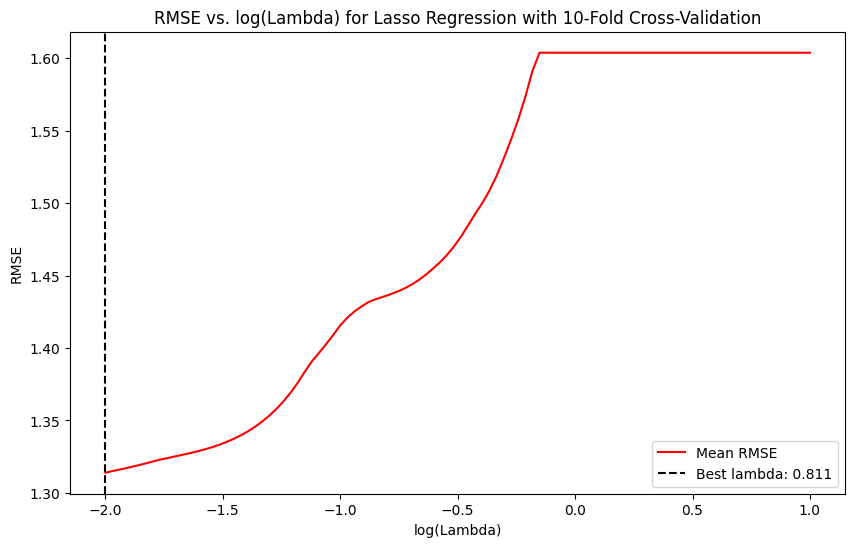

In [108]:
import matplotlib.pyplot as plt

# Plot RMSE against the log of alphas
plt.figure(figsize=(10, 6))
plt.plot(np.log10(alphas), rmse_scores, color='red', label='Mean RMSE')
plt.axvline(np.log10(best_alpha_lasso), linestyle='--', color='black', label=f'Best lambda: {best_alpha:.3f}')
plt.xlabel('log(Lambda)')
plt.ylabel('RMSE')
plt.title('RMSE vs. log(Lambda) for Lasso Regression with 10-Fold Cross-Validation')
plt.legend()
plt.show()

<div class="alert alert-block alert-success">
    
#### 6.2.3.  Evaluate the Final Model on the Test Data <a class="anchor" name="lasso_eval"></a>
    
</div>

It gave me a high RMSE on alpha 0.0008 as the non zero coefficients of predictor variables were cut down to 224. 

In [109]:
from sklearn.model_selection import KFold, cross_val_score

# Create the final pipeline with the best alpha
final_lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lasso', Lasso(alpha=0.0006, max_iter=10000))
])

# Perform 10-fold cross-validation on the entire dataset to evaluate the final model
final_cv_scores = cross_val_score(final_lasso_pipeline, X, y, cv=kf, scoring='neg_mean_squared_error')

# Compute the mean RMSE across all folds
final_mean_rmse = np.mean(np.sqrt(-final_cv_scores))
print(f"Final Mean RMSE across 10 folds: {final_mean_rmse:.3f}")


Final Mean RMSE across 10 folds: 1.093


<div class="alert alert-block alert-success">
    
#### 6.2.4.  Feature Importance <a class="anchor" name="lasso_feature"></a>
    
</div>

In [110]:
# Fit the final pipeline to the training data
final_lasso_pipeline.fit(X, y)

# Get the feature names after one-hot encoding
feature_names = final_lasso_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Extract the coefficients from the trained Lasso model
coefficients = final_lasso_pipeline.named_steps['lasso'].coef_

# Combine feature names with their coefficients
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort by absolute value of coefficient
feature_importance = feature_importance.reindex(feature_importance['Coefficient'].abs().sort_values(ascending=False).index)

# Display the most important features
print(feature_importance[feature_importance['Coefficient'] != 0])  # Features with non-zero coefficients


                Feature  Coefficient
28    num__Low_lag1_log    -9.528572
27   num__High_lag1_log     8.443379
182     cat__Stock_CVNA     4.325406
134     cat__Stock_CDLX     2.914738
622     cat__Stock_VNET     2.592683
..                  ...          ...
208     cat__Stock_DSGX    -0.002786
114       cat__Stock_BJ    -0.002584
553      cat__Stock_SRE    -0.001888
422      cat__Stock_NJR    -0.001160
149     cat__Stock_CMCO    -0.000817

[368 rows x 2 columns]


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming data_selected is your DataFrame and Volatility is the target variable
X = data_selected.drop('Volatility', axis=1)
y = data_selected['Volatility']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['number']).columns
numerical_cols = X.select_dtypes(exclude=['number']).columns

# Create column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ])

# Initialize KFold with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Create the final Lasso model with the best alpha
final_lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lasso', Lasso(alpha=0.0005, max_iter=10000))
])

# Perform 10-fold cross-validation on the entire dataset to evaluate the final model
final_cv_scores = cross_val_score(final_lasso_pipeline, X, y, cv=kf, scoring='neg_mean_squared_error')

# Compute the mean RMSE across all folds
final_mean_rmse = np.mean(np.sqrt(-final_cv_scores))
print(f"Final Mean RMSE across 10 folds: {final_mean_rmse:.3f}")



<div class="alert alert-block alert-info">
    
### 6.3. PCR <a class="anchor" name="lasso"></a>

<div class="alert alert-block alert-success">
    
#### 6.3.1.  Set Up the Pipeline with PCA and Linear Regression <a class="anchor" name="func"></a>
    
</div>

In [85]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

# Assuming data_selected is your DataFrame and Volatility is the target variable
X = data_selected.drop('Volatility', axis=1)
y = data_selected['Volatility']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Create column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    sparse_threshold=0  # Ensures output is dense
)

# Transform the entire dataset once using the preprocessor
X_transformed = preprocessor.fit_transform(X)

# Initialize KFold with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize list to store RMSE for each number of components
rmse_scores = []

# Determine the number of features after transformation
max_components = X_transformed.shape[1]

# Perform cross-validation to compute RMSE for each number of components
num_components_list = range(1, 300) 

for num_components in num_components_list:
    fold_rmse = []
    for train_idx, val_idx in kf.split(X_transformed):
        X_train_fold, X_val_fold = X_transformed[train_idx], X_transformed[val_idx]
        y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]
        
        # Apply PCA and Linear Regression only within the loop
        pca = PCA(n_components=num_components)
        X_train_pca = pca.fit_transform(X_train_fold)
        X_val_pca = pca.transform(X_val_fold)
        
        # Train the Linear Regression model
        model = LinearRegression()
        model.fit(X_train_pca, y_train_fold)
        
        # Predict and calculate RMSE for the validation fold
        y_val_pred = model.predict(X_val_pca)
        fold_rmse.append(np.sqrt(mean_squared_error(y_val_fold, y_val_pred)))
    
    # Average RMSE for this number of components
    rmse_scores.append(np.mean(fold_rmse))

    print(f"In component {num_components}")

# Find the best number of components based on RMSE
best_num_components = num_components_list[np.argmin(rmse_scores)]
print(f"Best number of components based on cross-validation: {best_num_components}")


In component 1
In component 2
In component 3
In component 4
In component 5
In component 6
In component 7
In component 8
In component 9
In component 10
In component 11
In component 12
In component 13
In component 14
In component 15
In component 16
In component 17
In component 18
In component 19
In component 20
In component 21
In component 22
In component 23
In component 24
In component 25
In component 26
In component 27
In component 28
In component 29
In component 30
In component 31
In component 32
In component 33
In component 34
In component 35
In component 36
In component 37
In component 38
In component 39
In component 40
In component 41
In component 42
In component 43
In component 44
In component 45
In component 46
In component 47
In component 48
In component 49
In component 50
In component 51
In component 52
In component 53
In component 54
In component 55
In component 56
In component 57
In component 58
In component 59
In component 60
In component 61
In component 62
In component 63
I

<div class="alert alert-block alert-success">
    
#### 6.3.2.  Plot RMSE against Number of Components <a class="anchor" name="func"></a>
    
</div>

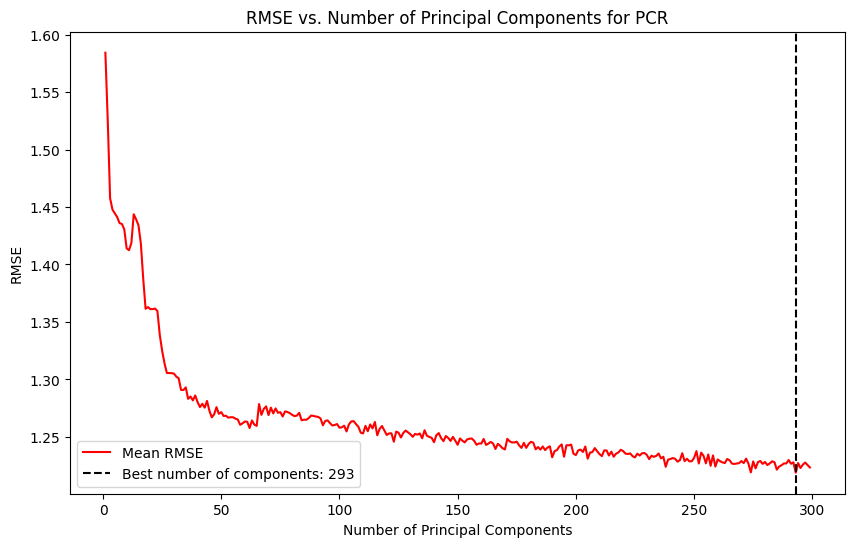

In [86]:
# Plot RMSE against the number of components
plt.figure(figsize=(10, 6))
plt.plot(num_components_list, rmse_scores, color='red', label='Mean RMSE')
plt.axvline(best_num_components, linestyle='--', color='black', label=f'Best number of components: {best_num_components}')
plt.xlabel('Number of Principal Components')
plt.ylabel('RMSE')
plt.title('RMSE vs. Number of Principal Components for PCR')
plt.legend()
plt.show()

<div class="alert alert-block alert-success">
    
#### 6.3.3.  Evaluate the Final Model on the Test Data <a class="anchor" name="func"></a>
    
</div>

In [111]:
# Create the final pipeline with the best number of components
final_pcr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=best_num_components)),
    ('linear_regression', LinearRegression())
])

# Perform 10-fold cross-validation on the entire dataset to evaluate the final model
final_cv_scores = cross_val_score(final_pcr_pipeline, X, y, cv=kf, scoring='neg_mean_squared_error')

# Compute the mean RMSE across all folds
final_mean_rmse_pcr = np.mean(np.sqrt(-final_cv_scores))
print(f"Final Mean RMSE across 10 folds: {final_mean_rmse_pcr:.3f}")


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\bilal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bilal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bilal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\pipeline.py", line 471, in fit
    Xt = self._fit(X, y, routed_params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bilal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\pipeline.py", line 408, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bilal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bilal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\pipeline.py", line 1303, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bilal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\_set_output.py", line 295, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bilal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bilal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\decomposition\_pca.py", line 454, in fit_transform
    U, S, Vt = self._fit(X)
               ^^^^^^^^^^^^
  File "C:\Users\bilal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\decomposition\_pca.py", line 472, in _fit
    raise TypeError(
TypeError: PCA only support sparse inputs with the "arpack" solver, while "auto" was passed. See TruncatedSVD for a possible alternative.


<div class="alert alert-block alert-success">
    
#### 6.3.4.  Examine the Explained Variance by Components <a class="anchor" name="func"></a>
    
</div>

In [ ]:
# Fit PCA on the entire training set to extract explained variance
pca = PCA(n_components=best_num_components)
X_train_transformed = pca.fit_transform(preprocessor.fit_transform(X_train))

# Calculate explained variance ratio
explained_variance = pca.explained_variance_ratio_.cumsum()

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, best_num_components + 1), explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

print(f"Cumulative explained variance with {best_num_components} components: {explained_variance[-1]:.2f}")


<div class="alert alert-block alert-warning"> 

## 7. Evaluating The Models  <a class="anchor" name="feature_ext"></a>

</div>

In this task, we developed and evaluated three machine learning models: Ridge Regression, Lasso Regression, and Principal Component Regression (PCR). The goal was to predict stock volatility, a crucial aspect in financial risk assessment. Below is an in-depth statistical comparison of the models, focusing on their accuracy, performance, advantages, and disadvantages in the context of the task.


<div class="alert alert-block alert-info">
    
### 7.1. Accuracy Evaluation Using RMSE <a class="anchor" name="lasso"></a>

`RMSE` (Root Mean Squared Error) is a widely used metric in regression models to assess predictive accuracy. It measures the average magnitude of the errors between predicted and actual values. Lower RMSE indicates better performance.

- Ridge Regression RMSE: 1.038

- Lasso Regression RMSE: 1.093

- PCR RMSE: 1.225

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame with RMSE values
rmse_data = pd.DataFrame({
    'Model': ['Ridge', 'Lasso', 'PCR'],
    'RMSE': [final_mean_rmse_ridge, final_mean_rmse_lasso, final_mean_rmse_pcr]
})

# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Model', y='RMSE', data=rmse_data)

# Set plot title and labels
plt.title('RMSE Comparison Between Ridge, Lasso, and PCR', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('RMSE', fontsize=12)

# Show the plot
plt.show()

To conclude, ridge provides the best RMSE which is slightly higher than Lasso, while pcr gives a lower RMSE score.


<div class="alert alert-block alert-info">
    
### 7.2. Statistical Comparison of the Models <a class="anchor" name="lasso"></a>

### Ridge Regression

#### Advantages:

`Handles multicollinearity`: Ridge penalizes large coefficients, which is useful for high-dimensional datasets like ours where features may be highly correlated.

`Improves generalization`: The regularization reduces overfitting by shrinking the coefficients, leading to better generalization across the 10 folds of cross-validation.

`Best RMSE`: The lowest RMSE of 1.038 indicates it is the best model in terms of predictive performance.

#### Disadvantages:

`No feature selection`: Ridge does not reduce the number of features, leading to a model with 638 features, which may not be ideal for interpretability. This could result in a complex model that is harder to understand and explain.

`Overfitting risk`: Although regularization helps reduce overfitting, retaining a large number of features could still increase model complexity and the risk of overfitting.

### Lasso Regression

#### Advantages:

`Feature selection`: Lasso performs automatic feature selection by setting some coefficients to zero, resulting in a simpler model with only 368 features (compared to Ridge's 638). This reduces model complexity and enhances interpretability.

`Sparse model`: By retaining fewer features, Lasso produces a sparse model, which is particularly useful in financial data, where only a subset of features may drive stock volatility.

`Trade-off between accuracy and complexity`: While Lasso's RMSE of 1.093 is slightly higher than Ridge's, the reduction in the number of features makes it a better alternative when simplicity and interpretability are valued.

#### Disadvantages:

`Less accurate than Ridge`: The RMSE is higher than Ridge, which suggests that it may not capture the full complexity of the data as effectively.

### Principal Component Regression (PCR)

#### Advantages:

`Dimensionality reduction`: PCR reduces the dataset to 293 components, which can help to simplify the model and remove noise from the data. It can be useful when the dataset contains highly correlated features, as it focuses on explaining variance.

`Avoids overfitting by reducing dimensionality`: The reduction in the number of components helps mitigate overfitting, especially in datasets with multicollinearity, by removing redundancy in the feature space.

#### Disadvantages:

`Lower accuracy`: The RMSE of 1.225 indicates that PCR is the least accurate model among the three. While it reduces the dimensionality, it may discard useful information that is important for predicting volatility, leading to weaker performance.

`Interpretability issues`: Since PCR relies on principal components rather than the original features, it is more challenging to interpret the impact of individual features on stock volatility. This can be problematic in financial contexts, where understanding the relationship between predictors and the target is important.

`Does not directly account for the target variable`: PCR focuses on maximizing variance in the predictor variables, without considering the target variable (volatility). This contrasts with Ridge and Lasso, which directly optimize the relationship between predictors and the target.


<div class="alert alert-block alert-info">
    
### 7.2. Statistical Comparison of the Models <a class="anchor" name="lasso"></a>